Deep learning hw2 Problem 1c

Jason Zhang

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

w1 = 0.3 
w2 = -0.5
x1 = 0.2
x2 = 0.4
gradient_step = 0.01
epoch = 30# Number of epochs/iterations
w = np.zeros([2, epoch]) # All w_1 and w_2 for each of the 30 epochs

In [2]:
#following the computational graph
def forward(w1, w2, x1, x2):
    a = 0.5*(np.power(w1, 2) + np.power(w2, 2))
    b = w1*x1
    c = w2*x2
    d = 1 + np.exp(-(b+c))
    e = (1/d) + a
    return [a, b, c, d, e]

In [3]:
#Compute the gradients
def backward(w1, w2, x1, x2, a, b, c, d, e):
    #grad_a_b = gradient of a with respect to b
    grad_e_d = - 1/(np.power(d, 2))
    grad_e_a = 1
    grad_d_b = -np.exp(-(b + c))
    grad_d_c = -np.exp(-(b + c))
    grad_a_w1 = w1
    grad_a_w2 = w2
    grad_b_w1 = x1
    grad_b_x1 = w1
    grad_c_w2 = x2
    grad_c_x2 = w2
    
    grad_e_w1 = grad_e_d*grad_d_b*grad_b_w1 + grad_e_a*grad_a_w1
    grad_e_w2 = grad_e_d*grad_d_c*grad_c_w2 + grad_e_a*grad_a_w2
    grad_e_x1 = grad_e_d*grad_d_b*grad_b_x1
    grad_e_x2 = grad_e_d*grad_d_c*grad_c_x2
    
#     print([grad_e_w1, grad_e_w2, grad_e_x1, grad_e_x2])
    return [grad_e_w1, grad_e_w2]

In [4]:
for i in range(epoch):
    w[0][i] = w1
    w[1][i] = w2
    forward_vals = forward(w1, w2, x1, x2)
    grads = backward(w1, w2, x1, x2,forward_vals[0],forward_vals[1], forward_vals[2], forward_vals[3], forward_vals[4])
    
    #updating weights
    w1 -= grads[0]*gradient_step
    w2 -= grads[1]*gradient_step

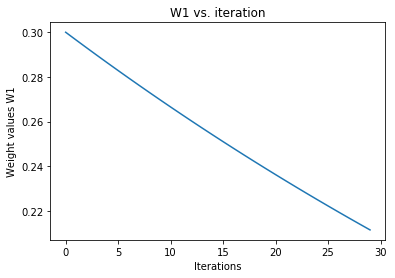

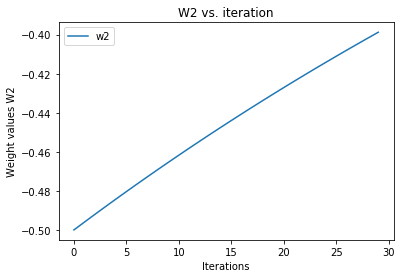

In [5]:
plt.figure(0)
plt.plot(w[0], label='w1')
plt.title('W1 vs. iteration')
plt.xlabel('Iterations')
plt.ylabel('Weight values W1')
plt.show()

plt.figure(1)
plt.title('W2 vs. iteration')
plt.plot(w[1], label='w2')
plt.xlabel('Iterations')
plt.ylabel('Weight values W2')
plt.legend()
plt.show()